Imports

In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

Question 1: Optimise the following function using torch autograd and gradient descent, f(θ) = (θ₀ - 2)² + (θ₁ - 3)². In addition to finding the optima, you need to show the convergence plots.

In [2]:
##Function to be minimized
f = lambda theta: (theta[0] -2)**2 + (theta[1] - 3)**2

In [3]:
##Optimization function

def optimize(lr, iterations, theta, func):
    losses = []
    optimizer = torch.optim.SGD([theta], lr=lr)
    for i in range(iterations):
        optimizer.zero_grad()
        loss = func(theta)
        loss.backward()
        optimizer.step()

        losses.append(loss.item())

    print('Optimal Paramters:', "θ₀: " ,theta[0].item(),"θ₁: ", theta[1].item())
    print('Final Loss:', losses[-1])
    return losses,theta

def plot_convergence(losses):
    plt.plot(losses)
    plt.xlabel('iterations')
    plt.ylabel('loss')
    plt.title('Convergence Plot')
    plt.show()
    

Optimal Paramters: θ₀:  1.999381422996521 θ₁:  2.9990715980529785
Final Loss: 1.2956879800185561e-06


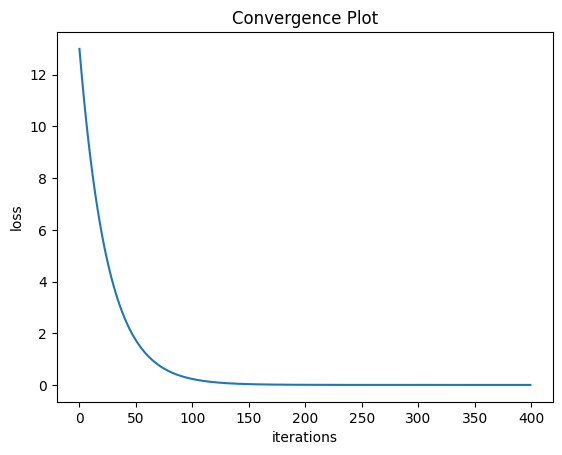

In [4]:
theta = torch.tensor([0.0, 0.0], requires_grad=True)
losses,theta = optimize(0.01,400,theta,f)
plot_convergence(losses)

Question 2: Generate some data (100 data points) using a univariate Normal distribution with loc=2.0 and scale=4.0.

a. Plot a 2d contour plot showing the Likelihood or the Log-Likelihood as a function of loc and scale. Please label all the axes including the colorbar. 

In [5]:
def ll(mu, sigma,data):
    mu = torch.tensor(mu)
    sigma = torch.tensor(sigma)
    return torch.distributions.Normal(loc=mu, scale=sigma).log_prob(data).sum()


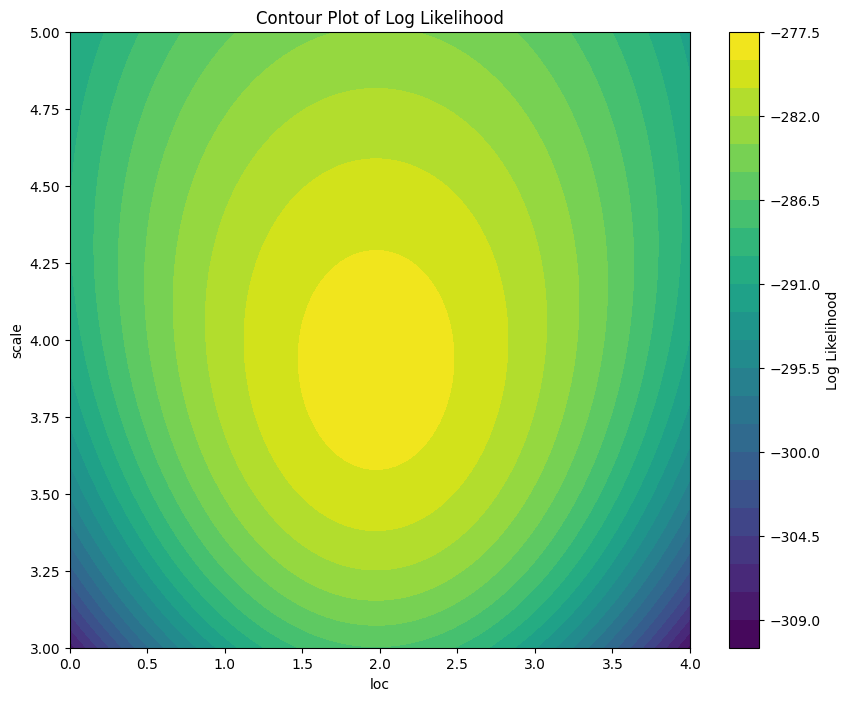

In [6]:
##Generating 100 datapoints from a univariate Normal distribution

torch.manual_seed(20)
normal = torch.distributions.Normal(loc=2.0, scale=4.0)
num_data_points = 100
data = normal.sample((num_data_points,))


loc_values = np.linspace(0, 4, 100)
scale_values = np.linspace(3, 5, 100)
loc_grid, scale_grid = np.meshgrid(loc_values, scale_values)


#Creating a grid of log likelihood values
log_likelihood_values = np.zeros_like(loc_grid)
for i in range(len(loc_values)):
    for j in range(len(scale_values)):
        log_likelihood = ll(loc_values[i], scale_values[j], data)
        log_likelihood_values[j, i] = log_likelihood.item()

# Create the contour plot
plt.figure(figsize=(10, 8))
contour = plt.contourf(loc_grid, scale_grid, log_likelihood_values, levels=20, cmap='viridis')
plt.colorbar(contour, label='Log Likelihood')
plt.xlabel('loc')
plt.ylabel('scale')
plt.title('Contour Plot of Log Likelihood')
plt.show()


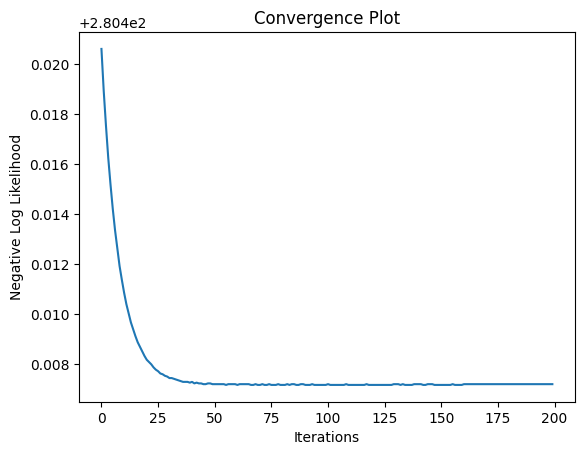

MLE Parameters:
loc: 1.9347765445709229
scale: 3.995358943939209


In [14]:
import torch
import matplotlib.pyplot as plt


loc = torch.tensor([2.0], requires_grad=True)
scale = torch.tensor([4.0], requires_grad=True)
data = torch.distributions.Normal(loc=2, scale=4).sample((100,))

learning_rate = 0.01
optimizer = torch.optim.SGD([loc, scale], lr=learning_rate)


convergence = []
iterations = 200


for i in range(iterations):
    optimizer.zero_grad()  
    log_likelihood = torch.distributions.Normal(loc=loc, scale=scale).log_prob(data).sum()
    loss = -log_likelihood  
    loss.backward()  
    optimizer.step() 
    
    # Save convergence information
    convergence.append(-log_likelihood.item())

# Plot the convergence
plt.plot(range(iterations), convergence)
plt.xlabel('Iterations')
plt.ylabel('Negative Log Likelihood')
plt.title('Convergence Plot')
plt.show()

print("MLE Parameters:")
print("loc:", loc.item())
print("scale:", scale.item())


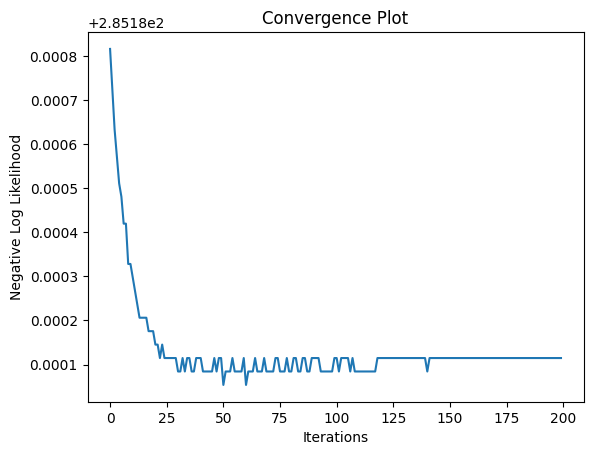

MLE Parameters:
loc: 1.9847456216812134
scale: 4.0


In [22]:
import torch
import matplotlib.pyplot as plt


loc = torch.tensor([2.0], requires_grad=True)
scale = torch.tensor([4.0], requires_grad=True)
log_scale = torch.tensor(torch.log(scale).detach().numpy(), requires_grad=True)
data = torch.distributions.Normal(loc=loc, scale=scale).sample((100,))

learning_rate = 0.01
optimizer = torch.optim.SGD([loc, log_scale], lr=learning_rate)


convergence = []
iterations = 200


for i in range(iterations):
    optimizer.zero_grad()  
    log_likelihood = torch.distributions.Normal(loc=loc, scale=scale).log_prob(data).sum()
    loss = -log_likelihood  
    loss.backward()  
    optimizer.step() 
    # Save convergence information
    convergence.append(-log_likelihood.item())

# Plot the convergence
plt.plot(range(iterations), convergence)
plt.xlabel('Iterations')
plt.ylabel('Negative Log Likelihood')
plt.title('Convergence Plot')
plt.show()

print("MLE Parameters:")
print("loc:", loc.item())
print("scale:", log_scale.exp().item())


It is better to learn log(scale) rather than scale because we know that scale is a positive number. Hence, firstly during gradient descent there are no constraints on the value of scale, thus, to put constraints it is better to learn log(scale). Secondly, the value of scale can be very large and hence the gradient descent will be very slow. Hence, it is better to learn log(scale) rather than scale.

Q3

Generate some data (1000 data points) using a univariate Normal distribution with loc=2.0 and scale=4.0 and using Student-T distributions with varying degrees (from 1-8) of freedom (1000 data points corresponding to each degree of freedom). Plot the pdf (and logpdf) at uniformly spaced data from (-50, 50) in steps of 0.1. What can you conclude?

Sampling data

In [53]:
torch.manual_seed(0)

loc = torch.tensor([2.0], requires_grad=True)
scale = torch.tensor([4.0], requires_grad=True)
data = torch.distributions.Normal(loc=2, scale=4).sample((100,))


degrees_of_freedom = [1, 2, 3, 4, 5, 6, 7, 8]
student_t_data = []
for df in degrees_of_freedom:
    data = torch.distributions.StudentT(loc = 2, scale = 4, df = df).sample((num_data_points,))
    student_t_data.append(data)


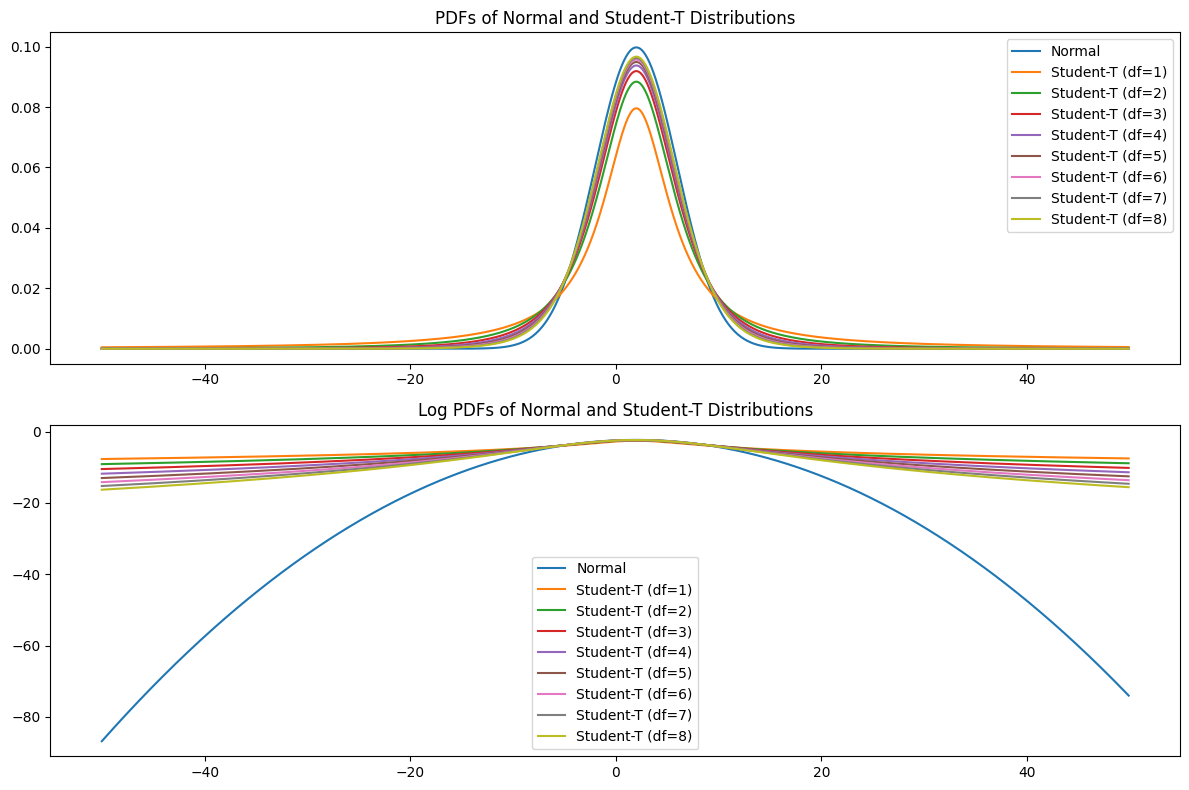

In [51]:
x = torch.arange(-50, 50, 0.1)

plt.figure(figsize=(12, 8))

# Plot Normal distribution and Student-T distributions
plt.subplot(2, 1, 1)
plt.plot(x, torch.distributions.Normal(loc=2, scale=4).log_prob(x).exp(), label='Normal')

for df in degrees_of_freedom:
    plt.plot(x, torch.distributions.StudentT(loc = 2, scale = 4, df= df).log_prob(x).exp(), label=f'Student-T (df={df})')
plt.title('PDFs of Normal and Student-T Distributions')
plt.legend()


# Plot log PDFs of Normal distribution and Student-T distributions
plt.subplot(2, 1, 2)
plt.plot(x, torch.distributions.Normal(loc=2, scale=4).log_prob(x), label='Normal')

for df in degrees_of_freedom:
    plt.plot(x, torch.distributions.StudentT(loc = 2, scale = 4, df=df).log_prob(x), label=f'Student-T (df={df})')
plt.title('Log PDFs of Normal and Student-T Distributions')
plt.legend()

plt.tight_layout()
plt.show()


As the degree of freedom increases, the student-T distribution starts approaching the normal distribution

Question 4

Analytically derive the MLE for exponential distribution. Generate some data (1000 data points) using some fixed parameter values and see if you can recover the analytical parameters using gradient descent based solution for obtaining MLE.

Analytical solution:

In [247]:
rate = 0.5
exp_dist = torch.distributions.exponential.Exponential(rate)
data = exp_dist.sample((1000,))

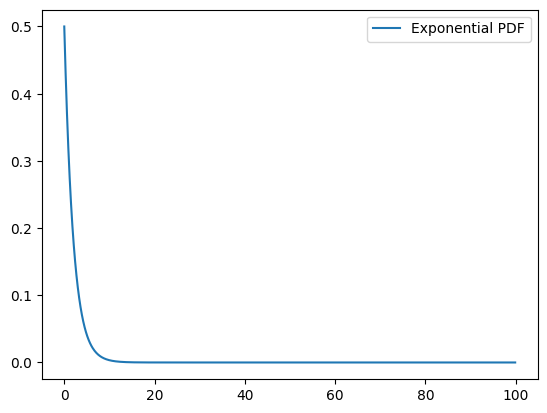

In [248]:
x = torch.arange(0, 100, 0.1)
plt.plot(x, exp_dist.log_prob(x).exp(), label='Exponential PDF')

plt.legend()
plt.show()


In [249]:
log_loss_fn = lambda x,lam,n: torch.log(lam)*n - lam*sum(x)

In [261]:
def optimize(lr, iterations, start_lambda, data):
    losses = []
    optimizer = torch.optim.SGD([start_lambda], lr=lr)
    for i in range(iterations):
        optimizer.zero_grad()
        loss = -log_loss_fn(data,start_lambda, data.shape[0])
        loss.backward()
        optimizer.step()

    return start_lambda

In [264]:
lambda_opt = optimize(0.0001,1000,torch.tensor([0.1], requires_grad = True),data)
print("Rate recovered: ", lambda_opt.item())
print("Rate true: ", rate)

Rate recovered:  0.49433478713035583
Rate true:  0.5


Question 5

Generate some data (100 data points) using a univariate Normal distribution with loc=2.0 and scale=4.0. Now, create datasets of size 10, 20, 50, 100, 500, 1000, 5000, 10000. We will use a different random seed to create ten different datasets for each of these sizes. For each of these datasets, find the MLE parameters for the loc and scale using gradient descent. Plot the estimates of loc and scale as a function of the dataset size. What can you conclude? 

In [ ]:
# Gradient descent function to estimate MLE parameters using torch.autograd
def gradient_descent(data, initial_params, learning_rate, num_iterations):
    optimizer = torch.optim.Adam(initial_params, lr=learning_rate)
    for i in range(num_iterations):
        optimizer.zero_grad()  
        log_likelihood = torch.distributions.Normal(loc=loc, scale=scale).log_prob(data).sum()
        loss = -log_likelihood  
        loss.backward()  
        optimizer.step() 
    
    return loc.item(), scale.item()

In [282]:
dataset_sizes = [10, 20, 50, 100, 500, 1000, 5000, 10000]

estimates_loc = []
estimates_scale = []

seeds = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Iterating through daatset sizes
for size in dataset_sizes:
    loc_estimates = []
    scale_estimates = []
    
    for i in range(10):  # Create 10 different datasets for each size
        torch.manual_seed(seeds[i])
        data = torch.distributions.normal.Normal(loc=2.0, scale=4.0).sample((size,))
        
        # Initialize parameters for gradient descent
        initial_loc = torch.tensor(10.0, requires_grad=True)
        initial_scale = torch.tensor(41.0, requires_grad=True)
        initial_params = [initial_loc, initial_scale]
        
        learning_rate = 0.01
        num_iterations = 100
        
        
        loc_estimate, scale_estimate = gradient_descent(data, initial_params, learning_rate, num_iterations)
        loc_estimates.append(loc_estimate)
        scale_estimates.append(scale_estimate)
    
    estimates_loc.append(np.mean(loc_estimates))
    estimates_scale.append(np.mean(scale_estimates))



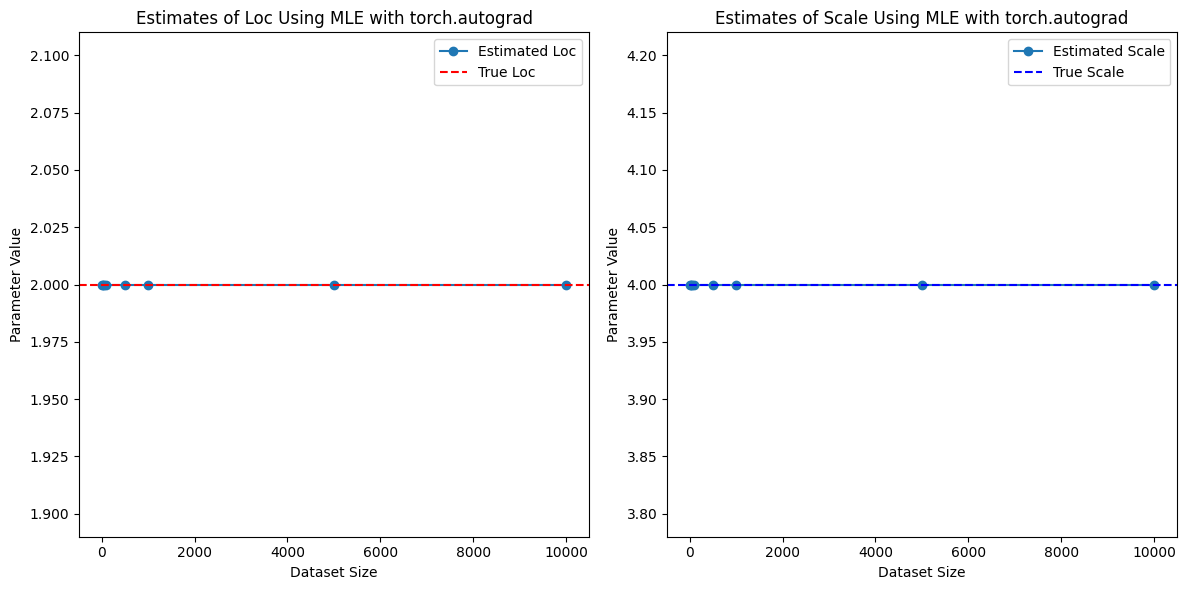

In [283]:
# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot estimated loc
ax1.plot(dataset_sizes, estimates_loc, marker='o', label='Estimated Loc')
ax1.axhline(y=2.0, color='r', linestyle='--', label='True Loc')
ax1.set_xlabel('Dataset Size')
ax1.set_ylabel('Parameter Value')
ax1.set_title('Estimates of Loc Using MLE with torch.autograd')
ax1.legend()

# Plot estimated scale
ax2.plot(dataset_sizes, estimates_scale, marker='o', label='Estimated Scale')
ax2.axhline(y=4.0, color='b', linestyle='--', label='True Scale')
ax2.set_xlabel('Dataset Size')
ax2.set_ylabel('Parameter Value')
ax2.set_title('Estimates of Scale Using MLE with torch.autograd')
ax2.legend()

# Adjust layout
plt.tight_layout()
plt.show()